# Neverwinter Combat Analysis
An examination of combat data exported from Neverwinter.

---

## Reading the logs
First lets import everything we will need to do our analysis and then read in the csv file.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

logs = pd.read_csv('logs/2017-10-01.csv', header=None, usecols=[0,3,4,6,9,10])

In [50]:
def clean_nulls(dataframe):
    df = dataframe.copy()
    for x in range(0, df.columns.size):
        column_name = df.columns[x]
        count = df[column_name].isnull().sum()
        percent = (count / len(df[column_name]) * 100)
        dtype = df[column_name].dtype
        if count > 0:
            if dtype == 'O':
                df[column_name].fillna('NA', inplace=True)
            elif dtype == 'float64':
                df[column_name].fillna(0, inplace=True)
    return df

In [52]:
clean = clean_nulls(logs)

## Filtering the logs
For our examination we are going to start by looking at the damage that the player (Harkken) dealt during combat. We will need to filter out some of the data in order to accomplish this, since other players and enemies are present in the data as well.

First we will filter the first column by rows that contain the name "Harkken".

Then we need to filter the third column to remove any rows that contain the word "Pet". This prevents us from seeing any damage that Harkken's pet may have dealt during combat.

After that we will filter on the fourth column to make sure that the damage was dealth to an enemy. We can do this by checking to see if the column is empty. If the column is empty, it implies the player injured himslef (a trap, perhaps) and we should filter that out.

Finally we need to filter the last column, column 10, which indicates damage dealt. We filter this to find values that are greater than zero. Anything less than zero implies a heal, and not combat damage.

In [58]:
def get_combat_damage(dataframe):
    df = dataframe.copy()
    df = df[df[4] != '']
    df = df[df[10] > 0]
    df = df[df[0].str.contains("Harkken") == True]
    df = df[df[3].str.contains("Pet") == False]
    df = df[df[6].str.contains("Marauder's Rush") == False]
    df = df[df[6].str.contains("Minor Body Injury") == False]
    df = df[df[6].str.contains("Aura of Courage") == False]
    df = df[df[6].str.contains("Clear the Ground") == False]
    df = df[df[6].str.contains("Grasping Roots") == False]
    df = df[df[6].str.contains("Disruptive Shot") == False]
    df = df[df[6].str.contains("Steel Breeze") == False]
    df = df[df[6].str.contains("Aimed Strike") == False]
    df = df[df[9].str.contains("Critical") == False]
    return df

In [59]:
cmbt = get_combat_damage(clean)
cmbt.head()

,0,3,4,6,9,10
23,17:09:28:22:50:35.0::Harkken,C[166107 Entity_Splitthesky],Imp,Split the Sky,NA,453.279
24,17:09:28:22:50:35.0::Harkken,C[166107 Entity_Splitthesky],Imp,Split the Sky,NA,396.013
25,17:09:28:22:50:35.0::Harkken,*,Imp,Constricting Arrow,Kill,692.335
30,17:09:28:22:50:36.2::Harkken,*,Imp,Electric Shot,Kill,279.502
32,17:09:28:22:50:36.2::Harkken,*,Imp,Electric Shot,NA,297.065


In [60]:
cmbt[9].value_counts()

NA            1663
Kill           320
Flank           48
Flank|Kill      15
Name: 9, dtype: int64

TypeError: object of type 'int' has no len()

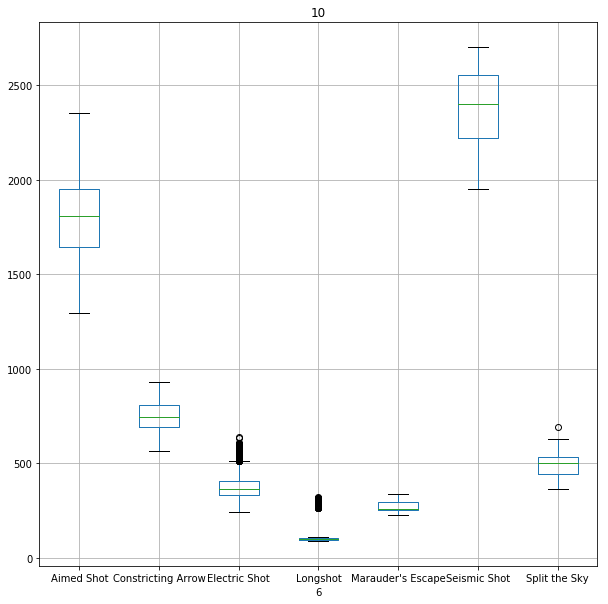

In [61]:
cmbt.boxplot(column=10, by=6, figsize=(10, 10))